## Overview

A magnitude 7.8 earthquake struck Nepal on April 25, 2015, toppling multi-story buildings in Kathmandu, the capital, and creating landslides and avalanches in the Himalaya Mountains. Nearly 9,000 people died and more than 22,000 suffered injuries.

The quake was followed by hundreds of aftershocks, and only 17 days later, there was another major quake, a magnitude 7.3 temblor. Thirty-nine of the nation’s 75 districts with a population of 8 million people — about a third of the national population — were affected. Hundreds of thousands of people lost everything and faced extreme poverty. 

More than 600,000 homes were destroyed and more than 288,000 were damaged in the 14 worst-hit districts. Hundreds of thousands of people lost everything and faced extreme poverty and homeless. 

## Business Problem

The Federal Democratic Republic of Nepal wants to avoid future building damages by reinforcing homes/buildings. They are wanting to know the possible damage risk level that current homes/buildings are at. So, they can better focus their resources, and protect their citizens of Nepal if and when another major earthquake occurs.

## Data Understanding

The data that will be used to predict the damage risk level comes from https://www.drivendata.org/, while original data comes from http://eq2015.npc.gov.np/#/. One of the largest dataset done on the aftermath of an earthquake.

The dataset mainly consists of 260601 rows each with information on the building structure and ownership. There are 40 columns in this dataset, where the building_id column is a unique and the target. The remaining 38 features are described in the section below. 

Driven Data also obfuscated random lowercase ascii characters to the categorical variables. Using the some of the original data we should be able to find out what this varilbes are and hopefully get some insight when doing the Exploratory Data Analysis (EDA).

### Target

|Target| Info|
|:-----| :-----|
|Grade 1| represents low damage|
|Grade 2| represents a medium amount of damage|
|Grade 3| represents almost complete destruction|

### Features

|Feature| Info|
|:-----| :-----|
|geo_level_1_id, geo_level_2_id, geo_level_3_id (type: int):| geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.|
|count_floors_pre_eq (type: int):| number of floors in the building before the earthquake.|
|age (type: int):| age of the building in years.|
|area_percentage (type: int):| normalized area of the building footprint.|
|height_percentage (type: int):| normalized height of the building footprint.|
|land_surface_condition (type: categorical):| surface condition of the land where the building was built. Possible values: n, o, t.|
|foundation_type (type: categorical):| type of foundation used while building. Possible values: h, i, r, u, w.|
|roof_type (type: categorical):| type of roof used while building. Possible values: n, q, x.|
|ground_floor_type (type: categorical):| type of the ground floor. Possible values: f, m, v, x, z.|
|other_floor_type (type: categorical):| type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.|
|position (type: categorical):| position of the building. Possible values: j, o, s, t.|
|plan_configuration (type: categorical):| building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.|
|has_superstructure_adobe_mud (type: binary):| flag variable that indicates if the superstructure was made of Adobe/Mud.|
|has_superstructure_mud_mortar_stone (type: binary):| flag variable that indicates if the superstructure was made of Mud Mortar - Stone.|
|has_superstructure_stone_flag (type: binary):| flag variable that indicates if the superstructure was made of Stone.|
|has_superstructure_cement_mortar_stone (type: binary):| flag variable that indicates if the superstructure was made of Cement Mortar - Stone.|
|has_superstructure_mud_mortar_brick (type: binary):| flag variable that indicates if the superstructure was made of Mud Mortar - Brick.|
|has_superstructure_cement_mortar_brick (type: binary):| flag variable that indicates if the superstructure was made of Cement Mortar - Brick.|
|has_superstructure_timber (type: binary):| flag variable that indicates if the superstructure was made of Timber.|
|has_superstructure_bamboo (type: binary):| flag variable that indicates if the superstructure was made of Bamboo.|
|has_superstructure_rc_non_engineered (type: binary):| flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.|
|has_superstructure_rc_engineered (type: binary):| flag variable that indicates if the superstructure was made of engineered reinforced concrete.|
|has_superstructure_other (type: binary):| flag variable that indicates if the superstructure was made of any other material.|
|legal_ownership_status (type: categorical):| legal ownership status of the land where building was built. Possible values: a, r, v, w.|
|count_families (type: int):| number of families that live in the building.|
|has_secondary_use (type: binary):| flag variable that indicates if the building was used for any secondary purpose.|
|has_secondary_use_agriculture (type: binary):| flag variable that indicates if the building was used for agricultural purposes.|
|has_secondary_use_hotel (type: binary):| flag variable that indicates if the building was used as a hotel.|
|has_secondary_use_rental (type: binary):| flag variable that indicates if the building was used for rental purposes.|
|has_secondary_use_institution (type: binary):| flag variable that indicates if the building was used as a location of any institution.|
|has_secondary_use_school (type: binary):| flag variable that indicates if the building was used as a school.|
|has_secondary_use_industry (type: binary):| flag variable that indicates if the building was used for industrial purposes.|
|has_secondary_use_health_post (type: binary):| flag variable that indicates if the building was used as a health post.|
|has_secondary_use_gov_office (type: binary):| flag variable that indicates if the building was used fas a government office.|
|has_secondary_use_use_police| binary| flag variable that indicates if the building was used as a police station.|
|has_secondary_use_other (type: binary):| flag variable that indicates if the building was secondarily used for other purposes.|

## Data Preparation

### Import Libraries and Tools

In [51]:
# Import pandas and set column display to max.
import pandas as pd
pd.set_option('display.max_columns', None)

# Import matplotlib and seaborn, set style theme to whitegrid. 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

# Import pickle
import pickle

# Import model and tranformers from sklearn.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# Import xgboost classifer.
from xgboost import XGBClassifier

# Import SMOTE to handle class imbalacne and pipeline.
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Pipeline

### Read in Datasets for Model

In [2]:
# Read in the data values.
df_values = pd.read_csv('Data/train_values.csv')

# Read in the data labels.
df_labels = pd.read_csv('Data/train_labels.csv')

# Merge the values and labes into one dataset.
df = df_values.merge(df_labels, on='building_id')
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


### Checking for Missing Values

In [3]:
# Check of missing values.
df.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

No missing values to worry about.

### Checking Featuer Types

In [4]:
# Checking featuer types.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

Some of the features that are mean to be Booleans are classified as int64.

In [5]:
# Making list of all colums that should be a boolean type. 
bool_list = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 
             'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
             'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
             'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 
             'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 
             'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 
             'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 
             'has_secondary_use_other']

# Loop though list to change types to boolean.
for name in bool_list:
    df[name] = df[name].astype('bool')

# Checking types one more time.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

### Categorical Column Value Names Data

All the categorical columns are represented by an obfuscated random lowercase ascii character, will use the some of the original data set to find out what the letters represent.

In [6]:
# Read in building structure data.
df_building_structure = pd.read_csv('Data/csv_building_structure.csv')

# Read in building owner one use data set.
df_building_ownership_and_use = pd.read_csv('Data/csv_building_ownership_and_use.csv')

# Merge the structure and owner into one data set. 
df_og = df_building_structure.merge(df_building_ownership_and_use, on=['building_id', 'district_id', 
                                                                       'vdcmun_id', 'ward_id'])
df_og.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Making a list of all categorical columns.
categorical_list = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 
                    'other_floor_type', 'position', 'plan_configuration', 'legal_ownership_status']

# Loop though each name in list and print the counts for each value.
for name in categorical_list:
    print('-----------------')
    print(name)
    print('***')
    print(df_og[name].value_counts())
    print('***')
    print(df[name].value_counts())

-----------------
land_surface_condition
***
Flat              631675
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64
***
t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64
-----------------
foundation_type
***
Mud mortar-Stone/Brick    628716
Bamboo/Timber              57473
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64
***
r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64
-----------------
roof_type
***
Bamboo/Timber-Light roof    503748
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: roof_type, dtype: int64
***
n    182842
q     61576
x     16183
Name: roof_type, dtype: int64
-----------------
ground_floor_type
***
Mud            618217
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dty

Look at the print out it looks like most of the random values in the df dataset do correspond to the df_og dataset. Will use the values to replace the random values.

In [8]:
# Make a function of replace value in categorical columns.
def replace_categorical_value(name):
    '''
    This function will take in a column name and loop thought the value count index from the df dataset and replace the
    the value with the value count index for the df_og data set.
    '''
    for i in range(len(df[name].value_counts().index)):
        df[name].replace({df[name].value_counts().index[i]: 
                                              df_og[name].value_counts().index[i]}, inplace=True)

# Look though each value in list and replace them.
for cat_value in categorical_list:
    replace_categorical_value(cat_value)

df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,True,True,False,False,False,False,False,False,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,Steep slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,RC,TImber/Bamboo-Mud,Not attached,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Attached-1 side,Rectangular,False,True,False,False,False,False,False,False,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,False,True,False,False,False,False,True,True,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,True,False,False,False,False,False,False,False,False,False,False,Private,1,False,False,False,False,False,False,False,False,False,False,False,3


## Exploratory Data Analysis (EDA)

### Class Counts

Lets take a look at are target classes and see what kind of counts we have.

In [9]:
# Looking at label counts. 
df['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

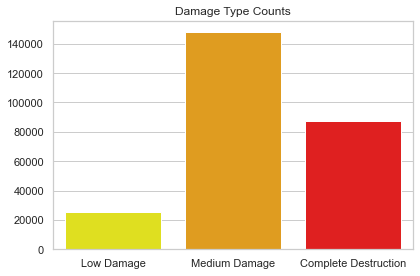

In [10]:
# Making a plot to visualize label counts.
fig, ax = plt.subplots()

# Defining x & y values.
x = df['damage_grade'].value_counts().index
y = df['damage_grade'].value_counts().values

# Making list for label names and colors.
labels = ['Low Damage', 'Medium Damage', 'Complete Destruction']
color = ['yellow','orange', 'red']

#Making bar plot.
ax = sns.barplot(x=x, y=y, palette=color)
ax.set_xticklabels(labels)
ax.set_title('Damage Type Counts')
ax.set_facecolor('white')
plt.tight_layout()

#Saving plot to Images folder.
fig.savefig('Images/classes.png')

Looks like are classes are imbalance this may cuase an issues down the road when we start training are models.

### Ploting Categorical Columns

In [160]:
# Define a function to loop thought a list of column names.
def countplot_loop(column_list,rotation):
    '''
    This function will loop thought a given list
    and return a countplot for each column name in
    a list and then save that plot to the Images folder.
    '''
    # Making a loop to go though each name in a list.
    for name in column_list:
        # Making figure.
        fig, ax = plt.subplots()

        # List of colors.
        color = ['yellow','orange', 'red']
        
        # Making countplot.
        sns.countplot(x=name, hue='damage_grade', palette=color, data=df, ax=ax)
        plt.xticks(rotation=rotation)
        plt.tight_layout()
        
        #Saving plot ot Image folder.
        fig.savefig(f'Images/{name}.png')

#### Superstructure Columns

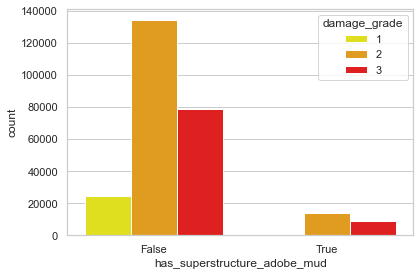

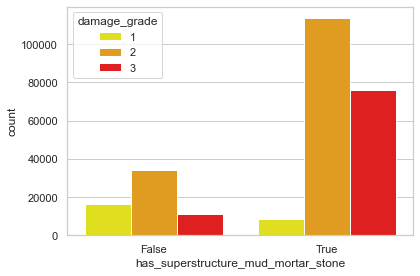

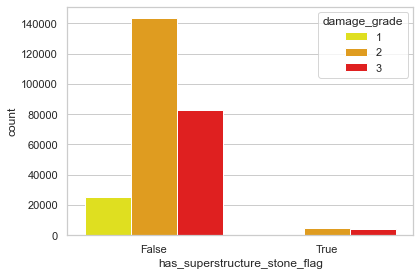

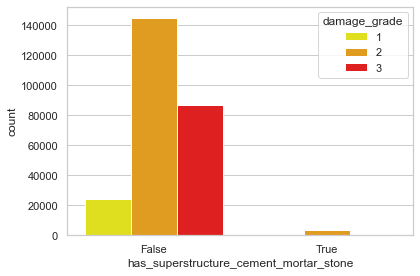

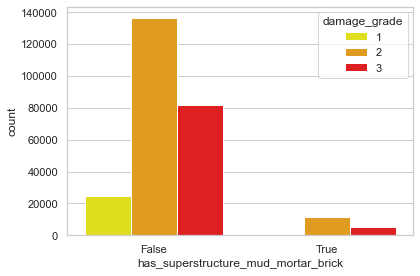

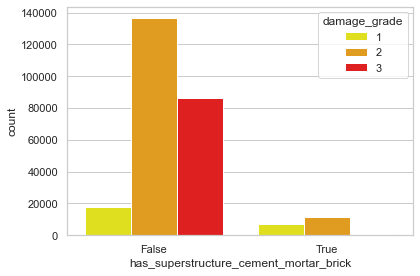

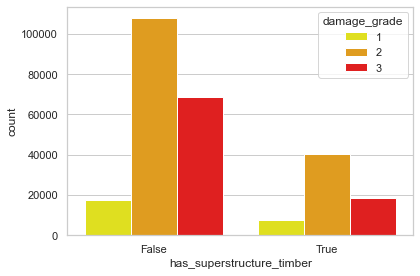

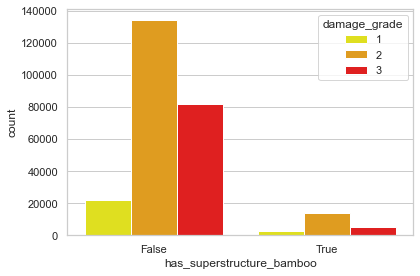

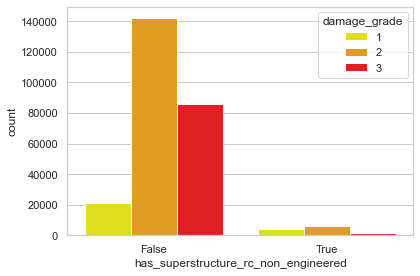

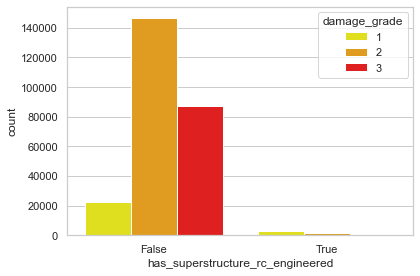

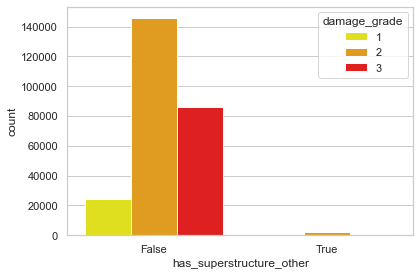

In [161]:
# Making list of only the superstucture columns.
column_superstructure = list(df.columns)[15:26]

# Using function to visualize columns as a countplot.
countplot_loop(column_superstructure, 0)

#### Secondary Columns

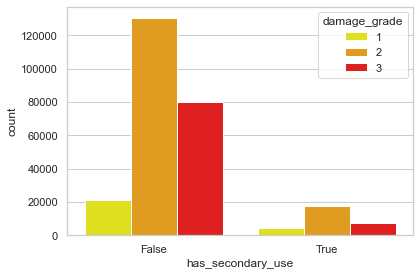

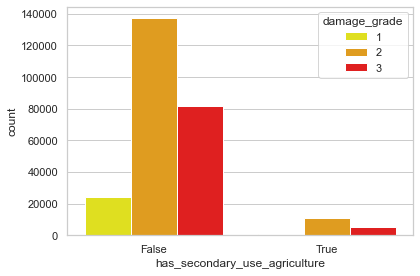

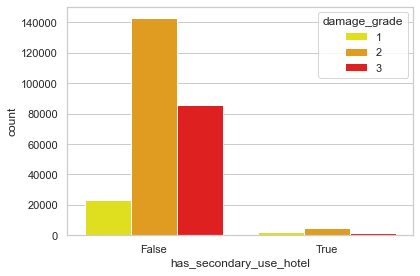

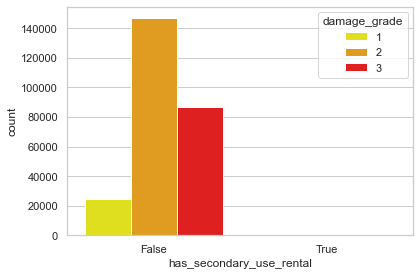

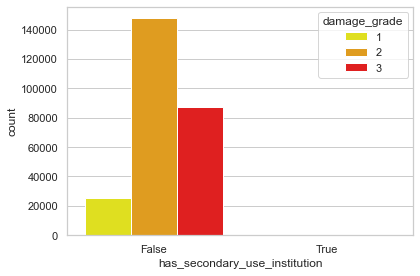

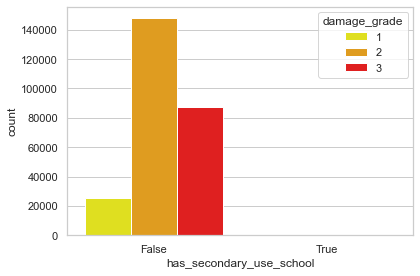

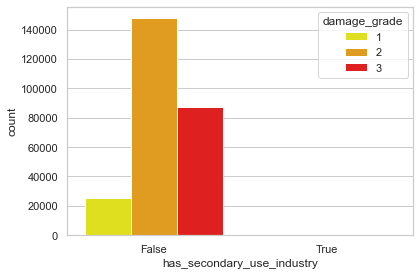

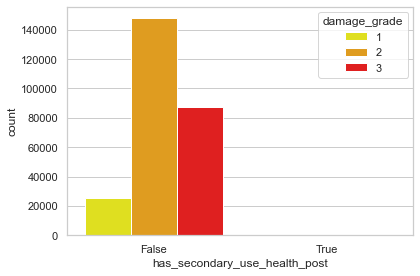

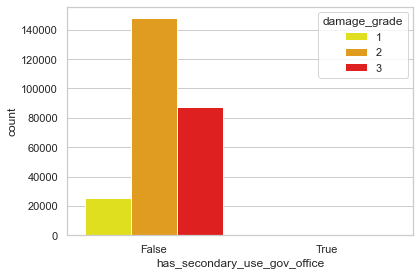

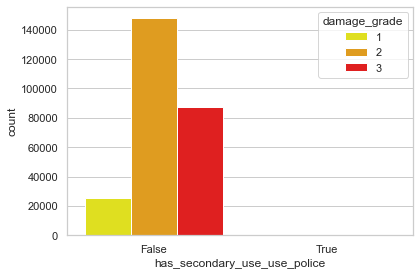

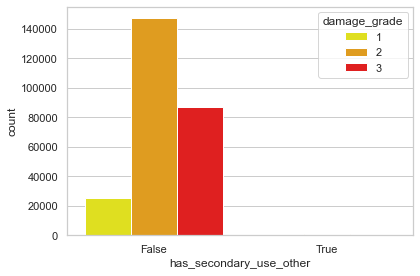

In [162]:
# Making list of only the secondary use columns.
column_secondary = list(df.columns)[28:-1]

# Using function to visualize columns as a countplot.
countplot_loop(column_secondary, 0)

#### Other Columns

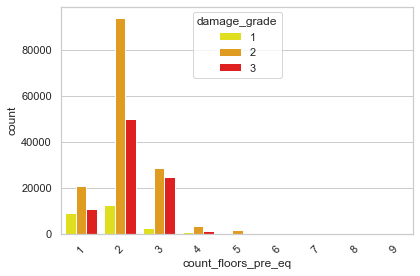

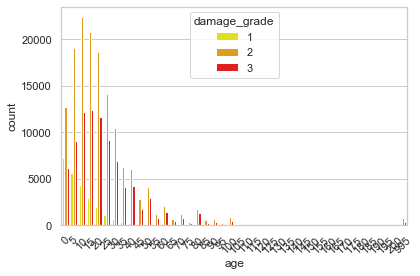

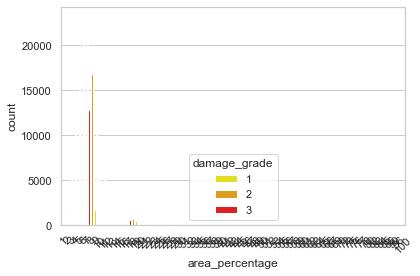

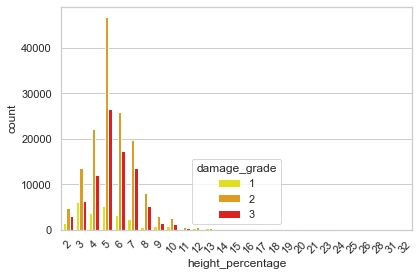

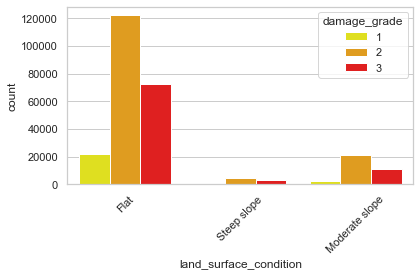

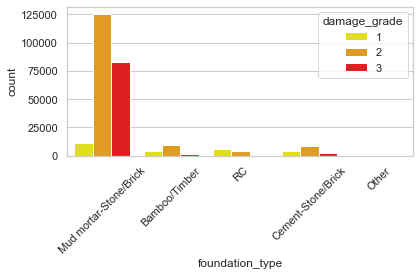

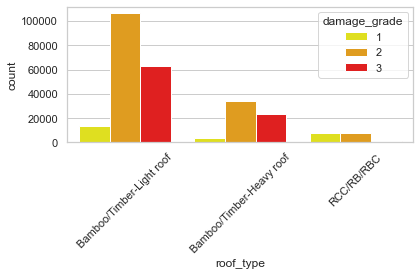

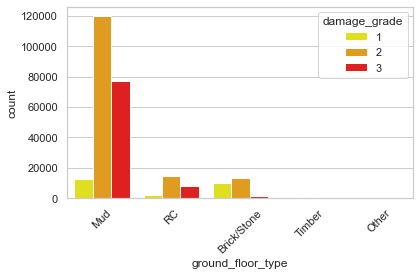

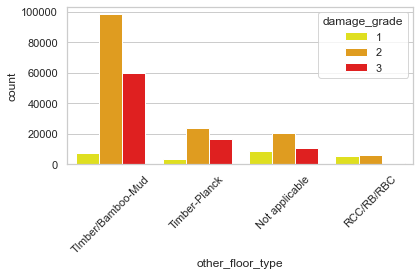

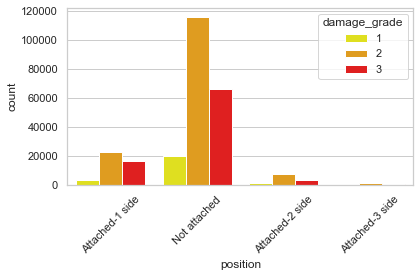

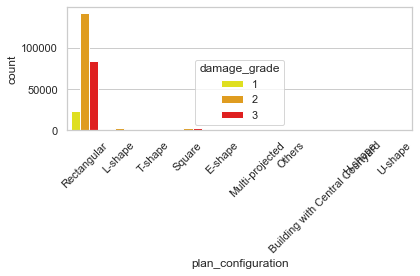

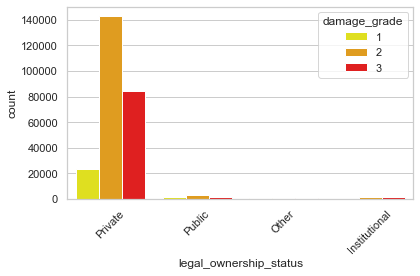

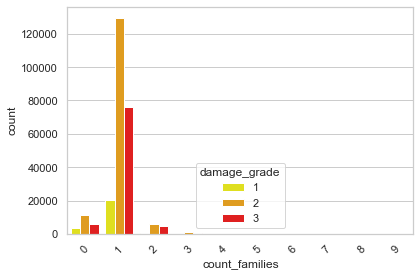

In [163]:
# Making list of other columns.
column_other = list(df.columns)[4:15] + list(df.columns)[26:28]

# Using function to visualize columns as a countplot.
countplot_loop(column_other, 45)

## First Simple Model (FSM)

For the FSM we will use just the numerical and boolean columns and the classifier we will use a Decision Tree Classifer. First things first, we need to split that data by doing a train test split.

In [15]:
# Difine the X and y values for fsm.
X_fsm = df.drop(['building_id', 'land_surface_condition', 'foundation_type', 
         'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 
         'legal_ownership_status', 'damage_grade'], axis=1)
y_fsm = df['damage_grade']

# Preform the train test split for fsm.
X_train_fsm, X_test_fsm, y_train_fsm, y_test_fsm = train_test_split(X_fsm, y_fsm, random_state=42, stratify=y_fsm)

In [16]:
# Instantiate decision tree classifier for a fsm.
fsm_dt = DecisionTreeClassifier(random_state=42)

# Fir the X and y train date to the fsm.
fsm_dt.fit(X_train_fsm, y_train_fsm)

DecisionTreeClassifier(random_state=42)

In [19]:
# Making function for printing scores.
def print_scores(model, X_train, X_test, y_train, y_test):
    '''
    This function will print the scoure for both train and test.
    '''
    # Predicting labels for both train and test data.
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    # Print out scores.
    print(f'        Model Scores')
    print('-----------------------------')
    print(' Accuracy:', accuracy_score(y_train, y_hat_train))
    print('   Recall:', recall_score(y_train, y_hat_train, average = 'macro'))
    print('Precision:', precision_score(y_train, y_hat_train, average = 'macro'))
    print('       F1:', f1_score(y_train, y_hat_train, average = 'macro'))
    print('-----------------------------')
    print(' Accuracy:', accuracy_score(y_test, y_hat_test))
    print('   Recall:', recall_score(y_test, y_hat_test, average = 'macro'))
    print('Precision:', precision_score(y_test, y_hat_test, average = 'macro'))
    print('       F1:', f1_score(y_test, y_hat_test, average = 'macro'))

In [20]:
# Print out fsm scores.
print_scores(fsm_dt, X_train_fsm, X_test_fsm, y_train_fsm, y_test_fsm)

        Model Scores
-----------------------------
 Accuracy: 0.9742082374008698
   Recall: 0.9746926003984552
Precision: 0.969726887943331
       F1: 0.9718795910888217
-----------------------------
 Accuracy: 0.6604503384445365
   Recall: 0.6149900294776912
Precision: 0.6073121797582424
       F1: 0.6109604665814518


In [130]:
# Making a function of confusion matrix.
def plot_cm(model, X, y):
    '''
    This function with change the sns theme back to plain white, 
    plot a confusion matrix and then return the sns theme back to whitegrid.
    '''
    # Setting theme back to white for confusion matrix.
    sns.set_theme(style="dark")
    
    # Setting confusion matrix as a variable.
    plot = plot_confusion_matrix(model, X, y, normalize='all', display_labels=['Low', 'Medium', 'Complete']);
    
    # Returning theme back to whitegrid.
    sns.set_theme(style="whitegrid")
    
    #Return plot.
    return plot

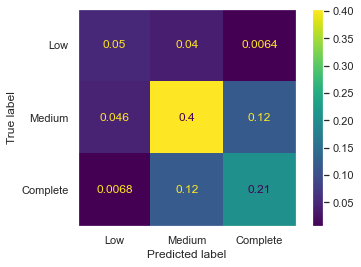

In [131]:
# Plotting fsm confusion matrix.
plot_cm(fsm_dt, X_test_fsm, y_test_fsm)

For the FSM 16.6% of the testing data is classified as a false negative.

## Preprocessing

Setting up preprocessing for vanilla models.

In [21]:
# Difine the X and y values for vms
X = df.drop(['building_id', 'damage_grade'], axis=1)
y = df['damage_grade']

# Preform the train test split for vms.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Making a list of all numeric columns.
num_list = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 
            'height_percentage', 'count_families']

# Making a list of all boolean columns.
bool_list =['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',  'has_superstructure_stone_flag', 
            'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 
            'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 
            'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 
            'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 
            'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 
            'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 
            'has_secondary_use_use_police', 'has_secondary_use_other']

# Making a list of all categorical columns.
cat_list = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
            'position', 'plan_configuration', 'legal_ownership_status']

# Setting of column transformer for each column list.
ct = ColumnTransformer([('ohe', OneHotEncoder(drop='first'), cat_list), 
                        ('ss', SimpleImputer(), num_list), 
                        ('si', SimpleImputer(), bool_list)])

# Fit and transform the train data and only transform the test data.
X_train_ct = ct.fit_transform(X_train)
X_test_ct = ct.transform(X_test)

# Use smote to handle label imbalance.
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train_ct, y_train)

## Vanilla Models

Now we will use the prepocessed data to train and test some vms. The models that we will be using are: KNeighborsClassifier, GaussianNB, LogisticRegression, Random Forest Classifer, and XGB Classifer.

### KNeighborsClassifier

In [22]:
# # Instantiate KNeighborsClassifier and fit X and y. 
# knc = KNeighborsClassifier()
# knc.fit(X_train_sm, y_train_sm)

# # Pickle model to count done when need to re run notebook.
# with open('Pickle/kneighbors_vm', 'wb') as f:
#      pickle.dump(knc, f)

# Open pickled model.
with open('Pickle/kneighbors_vm', 'rb') as f:
    knc = pickle.load(f)

# Print model's scores.
print_scores(knc, X_train_ct, X_test_ct, y_train, y_test)

        Model Scores
-----------------------------
 Accuracy: 0.7765106165259658
   Recall: 0.8258946020229
Precision: 0.7263370691321113
       F1: 0.7572691464515654
-----------------------------
 Accuracy: 0.6634894322420224
   Recall: 0.6880816897257244
Precision: 0.611128539767606
       F1: 0.633385319526554


### GaussianNB

In [24]:
# # Instantiate GaussianNB and fit X and y.
# gnb = GaussianNB()
# gnb.fit(X_train_sm, y_train_sm)

# # Pickle model to cut done time when need to rerun notebook.
# with open('Pickle/gaussian_nb_vm', 'wb') as f:
#      pickle.dump(gnb, f)

# Open pickled model.
with open('Pickle/gaussian_nb_vm', 'rb') as f:
    gnb = pickle.load(f)

# Print model's scores.
print_scores(gnb, X_train_ct, X_test_ct, y_train, y_test)

        Model Scores
-----------------------------
 Accuracy: 0.4222665643387056
   Recall: 0.5238633447369136
Precision: 0.4820254810161683
       F1: 0.40525117631533075
-----------------------------
 Accuracy: 0.42341637119921416
   Recall: 0.5273272948650579
Precision: 0.48493843628601613
       F1: 0.4088181014009207


### LogisticRegression

In [25]:
# # Instantiate LogisticRegression and fit X and y.
# lr = LogisticRegression()
# lr.fit(X_train_sm, y_train_sm)

# # Pickle model to cut done time when need to rerun notebook.
# with open('Pickle/logistic_vm', 'wb') as f:
#      pickle.dump(lr, f)

# Open pickled model.
with open('Pickle/logistic_vm', 'rb') as f:
    lr = pickle.load(f)

# Print model's scores.
print_scores(lr, X_train_ct, X_test_ct, y_train, y_test)

        Model Scores
-----------------------------
 Accuracy: 0.31900741877718086
   Recall: 0.4429848109015096
Precision: 0.390518064280658
       F1: 0.31276640307165304
-----------------------------
 Accuracy: 0.31981090083037866
   Recall: 0.44670901581043837
Precision: 0.39240549793664053
       F1: 0.3140840623426468


### Random Forest Classifer

In [26]:
# # Instantiate RandomForestClassifier and fit X and y.
# rfc = RandomForestClassifier(random_state=42)
# rfc.fit(X_train_sm, y_train_sm)

# # Pickle model to cut done time when need to rerun notebook.
# with open('Pickle/random_forest_vm', 'wb') as f:
#      pickle.dump(rfc, f)

# Open pickled model.
with open('Pickle/random_forest_vm', 'rb') as f:
    rfc = pickle.load(f)

# Print model's scores.
print_scores(rfc, X_train_ct, X_test_ct, y_train, y_test)

        Model Scores
-----------------------------
 Accuracy: 0.987347147608084
   Recall: 0.9863663087424103
Precision: 0.9868241824104965
       F1: 0.9865946036710954
-----------------------------
 Accuracy: 0.7112400423631257
   Recall: 0.6413932752904922
Precision: 0.6824085851726417
       F1: 0.6582082249518132


### XGB Classifer

In [27]:
# # Instantiate XGBClassifier and fit X and y.
# xgb = XGBClassifier()
# xgb.fit(X_train_sm, y_train_sm)

# # Pickle model to cut done time when need to rerun notebook.
# with open('Pickle/xgb_vm', 'wb') as f:
#      pickle.dump(xgb, f)

# Open pickled model.
with open('Pickle/xgb_vm', 'rb') as f:
    xgb = pickle.load(f)

# Print model's scores.
print_scores(xgb, X_train_ct, X_test_ct, y_train, y_test)

        Model Scores
-----------------------------
 Accuracy: 0.733251470964441
   Recall: 0.6606636902763361
Precision: 0.72117487377136
       F1: 0.6845419811772505
-----------------------------
 Accuracy: 0.7216312873171555
   Recall: 0.6446161127629831
Precision: 0.7007266196691101
       F1: 0.6667827021617386


Out of the five models that was ran, KNeighborsClassifier had both the highest train/test scores. Random Forest Classifer had the highest train score, but being that Random Forest tents to over fit easy. Will be using both of these models for hyperparameter tuning in the following GridSearch.

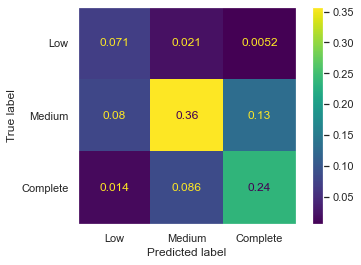

In [132]:
# Confusion matrix for best vanilla model.
plot_cm(knc, X_test_ct, y_test)

The best model out of the Vanilla Models 15.6% for the test data are being classified as a false negative.

## GridSearchCV

The first thing that needs to be done is that pipelines and a parameter grid need to be set up for the two classifiers that are going to be hyperparameter tuned. Then the grid searches for both models just need to be ran and will use the function print_scores to check how each model performed. And check the best parameter for both as well.

### Pipelines

In [28]:
# Difine the X and y values for gs_cv.
X = df.drop(['building_id', 'damage_grade'], axis=1)
y = df['damage_grade']

# Preform the train test split for gs_cv.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Setting of column transformer for each column list.
ct = ColumnTransformer([('ohe', OneHotEncoder(drop='first'), cat_list), 
                        ('si_num', SimpleImputer(), num_list), 
                        ('si_bool', SimpleImputer(), bool_list)])

# Setting up smote to handle label imbalance.
sm = SMOTE(random_state=42)

# Setting up pileline for k neighors grid search.
pipe_knc = Pipeline([('ct_pipe', ct), 
                     ('sm_pipe', sm), 
                     ('knc_pipe', KNeighborsClassifier())])

# Setting up parameter grid for k neighors grid search
param_grid_knc = {
    'knc_pipe__n_neighbors': [3, 5, 10, 12],
    'knc_pipe__weights': ['uniform', 'distance'],
    'knc_pipe__p': [1, 2],
    'knc_pipe__n_jobs': [-1, 1, 2]
}

# Setting up pileline for random forest grid search.
pipe_rfc = Pipeline([('ct_pipe', ct), 
                 ('sm_pipe', sm), 
                 ('rfc_pipe', RandomForestClassifier(random_state=42))])

# Setting up parameter grid for random forest grid search.
param_grid_knc = {
    'rfc_pipe__bootstrap': [True, False],
    'rfc_pipe__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'rfc_pipe__max_features': ['auto', 'sqrt'],
    'rfc_pipe__min_samples_leaf': [1, 2, 4],
    'rfc_pipe__min_samples_split': [2, 5, 10],
    'rfc_pipe__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

### KNeighorsClassifier

In [29]:
# # Instantiate gridsearch for k neighors.
# gs_cv_knc = GridSearchCV(estimator=pipe_knc, param_grid=param_grid_knc, scoring='recall_macro', 
#                      cv=5, verbose=1, return_train_score=True)
# gs_cv_knc.fit(X_train, y_train)

# # Pickle model to cut done time when need to rerun notebook.
# with open('Pickle/gird_search_knc', 'wb') as f:
#      pickle.dump(gs_cv_knc, f)

# Open pickled model.
with open('Pickle/gird_search_knc', 'rb') as f:
    gs_cv_knc = pickle.load(f)

# Print model's scores.
print(gs_cv_knc.best_score_)
print('')
print(gs_cv_knc.best_params_)
print('')
print_scores(gs_cv_knc, X_train, X_test, y_train, y_test)

0.6965513290275445

{'knc_pipe__n_jobs': -1, 'knc_pipe__n_neighbors': 10, 'knc_pipe__p': 1, 'knc_pipe__weights': 'uniform'}

        Model Scores
-----------------------------
 Accuracy: 0.748119723714505
   Recall: 0.7940375301737518
Precision: 0.6971429279434084
       F1: 0.7264383087951195
-----------------------------
 Accuracy: 0.6826295835827539
   Recall: 0.7084329101607633
Precision: 0.6293136855468423
       F1: 0.6529252985576525


### RandomForestClassifier

In [30]:
# # Instantiate gridsearch for random forest.
# gs_cv_rfc = GridSearchCV(estimator=pipe_rfc, param_grid=param_grid_knc, scoring='recall_macro', 
#                      cv=3, verbose=1, return_train_score=True)
# # Fit the training data to the model.
# gs_cv_rfc.fit(X_train, y_train)

# # Pickle model to cut done time when need to rerun notebook.
# with open('Pickle/gird_search_rfc', 'wb') as f:
#      pickle.dump(gs_cv_rfc, f)

# Open pickled model.
with open('Pickle/gird_search_rfc', 'rb') as f:
    gs_cv_rfc = pickle.load(f)

# Print model's scores.
print(gs_cv_rfc.best_score_)
print('')
print(gs_cv_rfc.best_params_)
print('')
print_scores(gs_cv_rfc, X_train, X_test, y_train, y_test)

0.6340557495650673

{'rfc_pipe__bootstrap': True, 'rfc_pipe__max_depth': None, 'rfc_pipe__max_features': 'auto', 'rfc_pipe__min_samples_leaf': 2, 'rfc_pipe__min_samples_split': 10, 'rfc_pipe__n_estimators': 1000}

        Model Scores
-----------------------------
 Accuracy: 0.8251573292402149
   Recall: 0.7738318805178436
Precision: 0.8247552934891266
       F1: 0.7952232273315998
-----------------------------
 Accuracy: 0.7174103237095363
   Recall: 0.6468860046567152
Precision: 0.6914801874479407
       F1: 0.66413389851544


## Final Model Evaluation

With the recall test score being 70.8% the k neighors classifer is still the best model after using grid scearch to hyperparameter tune. With the first simple model being 61.5% that is an impovement of 9.3%.

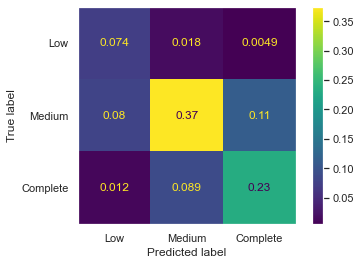

In [133]:
# Confusion matrix for knc.
plot_cm(gs_cv_knc, X_test, y_test)

Taking a look at the confusion matrix for k neighors grid search we can see that now we are only classifying 13.2% which is 3.4% that are no longer being missclassified compared to the first simple model.

### Feature Importance

In order to get the feature importance from an KNeighors Classifier we will have to use permutation_importance from sklearn inspection.

In [143]:
# # Use permutation_importance to get feature importance.
# results = permutation_importance(gs_cv_knc, X_test, y_test, scoring='recall_macro', 
#                                  n_repeats=30, random_state=42)

# # Pickle results to cut done time when need to rerun notebook.
# with open('Pickle/results', 'wb') as f:
#      pickle.dump(results, f)

# Open pickled results.
with open('Pickle/results', 'rb') as f:
    results = pickle.load(f)

# Making a list of all features in the order that they was transformed.
col_names = cat_list + num_list + bool_list

# Blank dict.
feature_importance = {}

# For loop to add the sum of each feature importances to the blank dict.
for i in range(len(results.importances)-1):
    feature_importance[col_names[i]] = results.importances[i].sum()

# Changing the dict into a dataframe and transposing it.
feature_importance = pd.DataFrame(feature_importance, index=range(len(results.importances)-1)).transpose()

# Sorting the values of the top ten features.
feature_importance = pd.DataFrame(feature_importance[0].sort_values(ascending=False)[:10])
feature_importance

,0
roof_type,9.722495
foundation_type,9.610197
other_floor_type,1.320333
position,0.162649
land_surface_condition,0.114191
geo_level_1_id,0.076375
count_floors_pre_eq,0.061661
geo_level_2_id,0.056982
plan_configuration,0.047470
count_families,0.045260


Now that we have the feature importance from the final model we can see that roof type and founfation type are the top two most important features.